# Imports

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [ ]:
!pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [ ]:
from PyEMD import EMD
import sys
sys.executable

'/usr/bin/python3'

In [ ]:
!unzip p17_pkl.zip

Archive:  p17_pkl.zip
   creating: p17_pkl/
  inflating: p17_pkl/A0340C_230727-000250_E4.pickle  
  inflating: __MACOSX/p17_pkl/._A0340C_230727-000250_E4.pickle  
  inflating: p17_pkl/record_270766_hex.pickle  
  inflating: __MACOSX/p17_pkl/._record_270766_hex.pickle  


In [ ]:
# Load Wrist Data
# wrist_data_dir = 'A037F7_221005-110525/E4/'

with open('p17_pkl/A0340C_230727-000250_E4.pickle', 'rb') as file:
    wrist_data = pickle.load(file, encoding='latin1')


# Load Chest Data
# chest_data_dir = 'record_254429/Hex/'

with open('p17_pkl/record_270766_hex.pickle', 'rb') as file:
    chest_data = pickle.load(file, encoding='latin1')


print("Wrist Data: \n", wrist_data)
print("Chest Data: \n", chest_data)


Wrist Data: 
 {'EDA': array([[0.      ],
       [0.151188],
       [0.206282],
       ...,
       [1.150902],
       [1.153464],
       [1.147058]]), 'TEMP': array([[35.  ],
       [35.  ],
       [35.  ],
       ...,
       [36.16],
       [36.16],
       [36.16]]), 'BVP': array([[ -0.  ],
       [ -0.  ],
       [ -0.  ],
       ...,
       [ 71.62],
       [ 13.43],
       [-49.42]]), 'Acceleration_X': array([[-2.],
       [-2.],
       [-2.],
       ...,
       [15.],
       [14.],
       [ 8.]]), 'Acceleration_Y': array([[ 8.],
       [ 8.],
       [ 8.],
       ...,
       [16.],
       [21.],
       [19.]]), 'Acceleration_Z': array([[62.],
       [62.],
       [62.],
       ...,
       [60.],
       [58.],
       [54.]]), 'Acceleration': array([[-2.,  8., 62.],
       [-2.,  8., 62.],
       [-2.,  8., 62.],
       ...,
       [15., 16., 60.],
       [14., 21., 58.],
       [ 8., 19., 54.]])}
Chest Data: 
 {'ECG': array([[ 9.3376],
       [11.7568],
       [12.5056],
       ...,

In [ ]:
# Extract data, and convert to 1D
br_data = chest_data['breathing_rate'].reshape(-1)
ecg_data = chest_data['ECG'].reshape(-1)
eda_data = wrist_data['EDA'].reshape(-1)
bvp_data = wrist_data['BVP'].reshape(-1)

print("\nBR Data: \n", br_data)
print("\nECG Data: \n", ecg_data)
print("\nEDA Data: \n", eda_data)
print("\nBVP Data: \n", bvp_data)


BR Data: 
 [10. 10. 10. ... 20. 19. 19.]

ECG Data: 
 [ 9.3376 11.7568 12.5056 ...  8.7936  8.8192  8.8128]

EDA Data: 
 [0.       0.151188 0.206282 ... 1.150902 1.153464 1.147058]

BVP Data: 
 [ -0.    -0.    -0.   ...  71.62  13.43 -49.42]


In [ ]:
# ECG data
ecg_length = len(ecg_data)
time_ecg = np.arange(ecg_length) / 256

# EMG data
br_length = len(br_data)
time_br = np.arange(br_length) / 128

# EDA Chest data
eda_length = len(eda_data)
time_eda = np.arange(eda_length) / 4

# BVP data
bvp_length = len(bvp_data)
time_bvp = np.arange(bvp_length) / 64

print(time_ecg[-1], time_br[-1], time_eda[-1], time_bvp[-1])


# RespiBAN is placed around the subject’s chest (see Figure 1). It collects the following measures:
#     Electrocardiogram (ECG), electrodermal activity (EDA), Electromyography (EMG), Respiration (RESP),
#     Skin Temperature (TEMP), and linear Acceleration (ACC). All signals are sampled at 700 Hz.

# The Empatica E4 wristband was worn on the nondominant hand. Measures recorded using the E4 were blood volume
#     pulse (BVP), EDA, TEMP and ACC, which were sampled at 64 Hz, 4 Hz, 4 Hz, and 32 Hz, respectively.

1362.0 10.640625 2264.0 2263.75


In [ ]:
sample_rate_chest = 700  # Hz
sample_rate_wrist = 64   # Hz

# Adjusting the subset to be a start/end in seconds as desired
start = 20 #sec
end = 182 #sec

ecg_data = ecg_data[start*256:end*256]
eda_chest_data = eda_data[start*700:end*700]
br_data = br_data[start*128:end*128]
bvp_data = bvp_data[start*64:end*64]


# EMD - Data Prep

In [ ]:
# Plot raw ECG signal with time on x-axis
plt.figure(figsize=(12, 2))
plt.plot(time_ecg, ecg_data)
plt.title('Raw ECG Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(axis='x')  # Show x-axis gridlines
# plt.show()
plt.tight_layout()
plt.savefig("ECG.png", dpi=300)

# Plot raw EMG signal with time on x-axis
plt.figure(figsize=(12, 2))
plt.plot(time_br, br_data, color='r')
plt.title('Raw BR Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(axis='x')  # Show x-axis gridlines
# plt.show()
plt.tight_layout()
plt.savefig("BR.png", dpi=300)

# Plot raw EMG signal with time on x-axis
plt.figure(figsize=(12, 2))
plt.plot(time_eda, eda_data, color='b')
plt.title('Raw EDA Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(axis='x')  # Show x-axis gridlines
# plt.show()
plt.tight_layout()
plt.savefig("EDA.png", dpi=300)

# Plot raw EMG signal with time on x-axis
plt.figure(figsize=(12, 2))
plt.plot(time_bvp, bvp_data, color='b')
plt.title('Raw BVP Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(axis='x')  # Show x-axis gridlines
# plt.show()
plt.tight_layout()
plt.savefig("BVP.png", dpi=300)


NameError: ignored

In [ ]:
# Prepare EMD
emd = EMD()

imfs_ecg = emd(ecg_data, max_imf=4)
imfs_br = emd(br_data, max_imf=4)
imfs_eda = emd(eda_data, max_imf=4)
imfs_bvp = emd(bvp_data, max_imf=4)

# EDA rescaling
# RespiBAN is placed around the subject’s chest (see Figure 1). It collects the following measures: Electrocardiogram (ECG), electrodermal activity (EDA), Electromyography (EMG), Respiration (RESP), Skin Temperature (TEMP), and linear Acceleration (ACC). All signals are sampled at 700 Hz.
# The Empatica E4 wristband was worn on the nondominant hand. Measures recorded using the E4 were blood volume pulse (BVP), EDA, TEMP and ACC, which were sampled at 64 Hz, 4 Hz, 4 Hz, and 32 Hz, respectively.

In [ ]:
# New figure for ECG data
fig = plt.figure(figsize=(12, 9))

# Get number of IMFs
n_imfs_ecg = imfs_ecg.shape[0]
n_imfs_br = imfs_br.shape[0]
n_imfs_eda = imfs_eda.shape[0]
n_imfs_bvp = imfs_bvp.shape[0]



<Figure size 1200x900 with 0 Axes>

# ECG Data

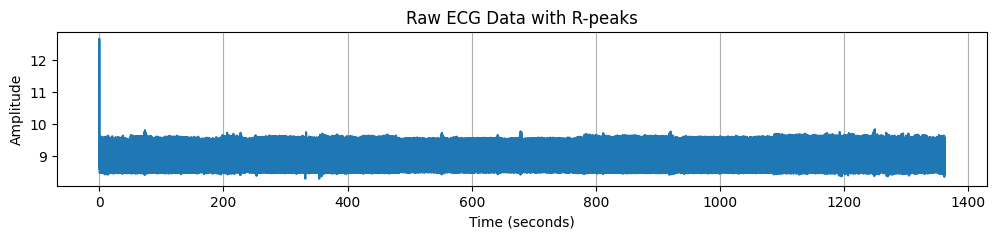

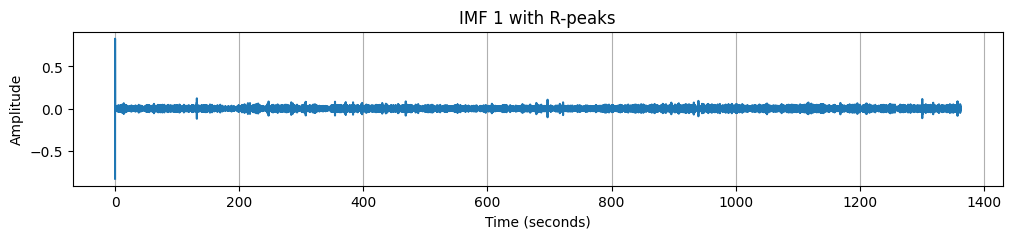

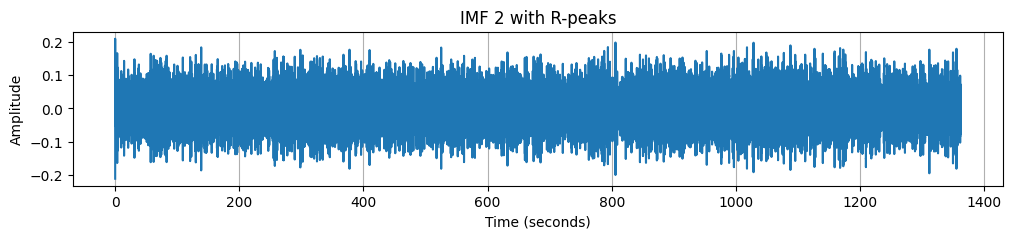

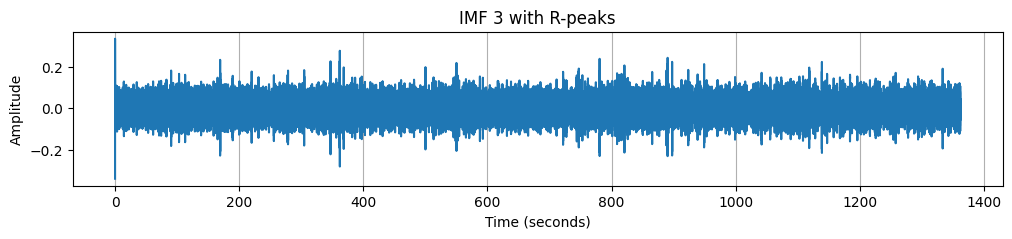

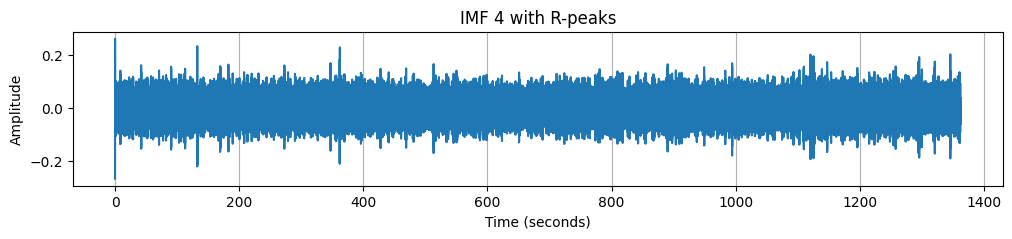

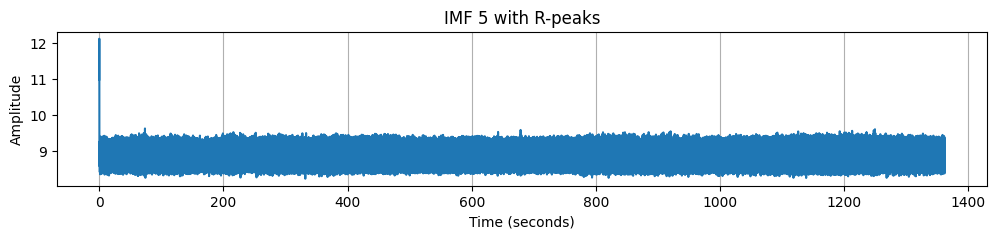

In [ ]:
from scipy.signal import find_peaks

# Detect R-peaks in the ECG data
r_peaks, _ = find_peaks(ecg_data, distance=256/2.5)  # adjust parameters as needed

# Convert peak indices to time
r_peaks_time = r_peaks / 256

# Plot raw ECG signal with R-peaks
plt.figure(figsize=(12, 2))
plt.plot(time_ecg, ecg_data)
plt.title('Raw ECG Data with R-peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
# for r_peak in r_peaks_time:
#     plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()

# Plot IMFs with R-peaks
for i in range(n_imfs_ecg):
    plt.figure(figsize=(12, 2))
    plt.plot(time_ecg, imfs_ecg[i])
    plt.title('IMF ' + str(i+1) + ' with R-peaks')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    # for r_peak in r_peaks_time:
    #     plt.axvline(x=r_peak, color='brown', linestyle='--')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()


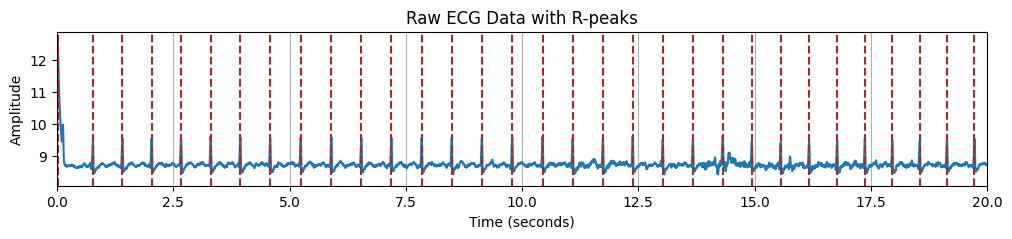

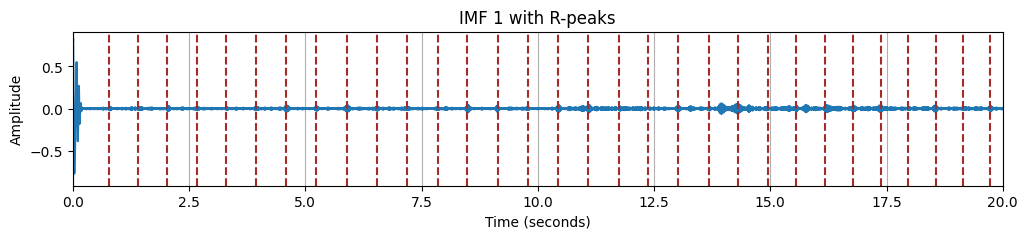

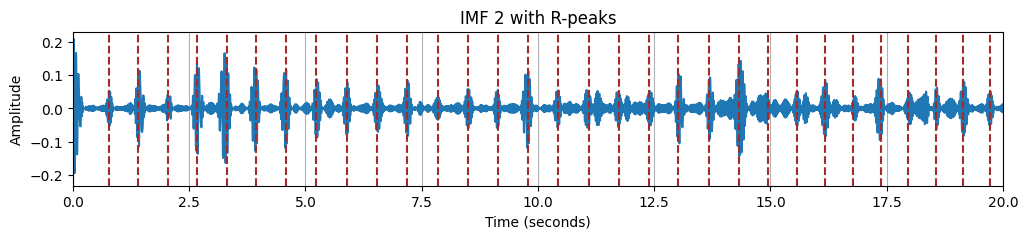

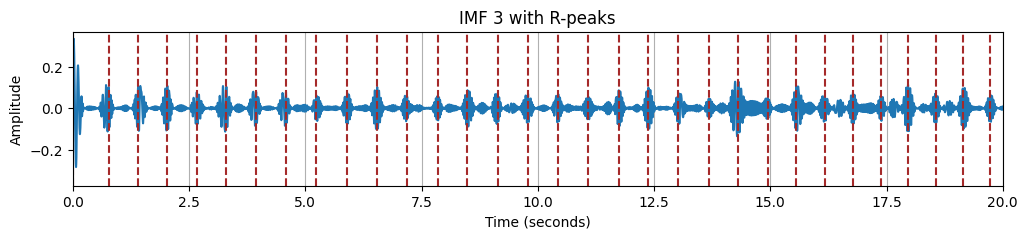

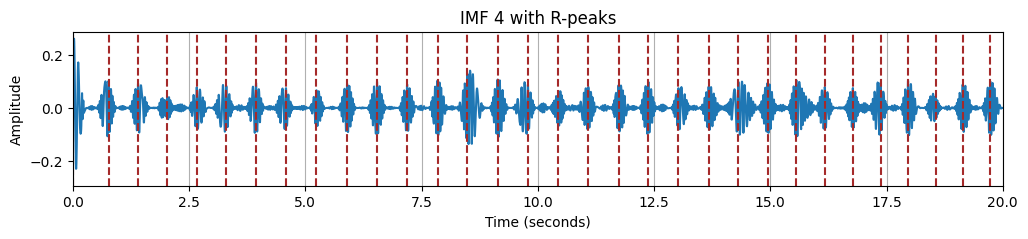

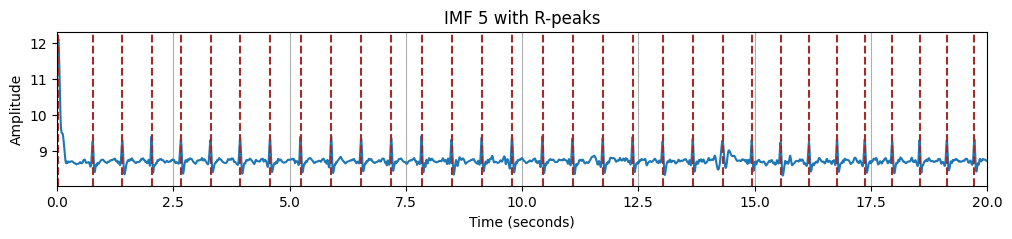

In [ ]:
# Choose subsection limits
x1 = 0
x2 = 20

# Plot raw ECG signal with R-peaks
plt.figure(figsize=(12, 2))
plt.plot(time_ecg, ecg_data)
plt.title('Raw ECG Data with R-peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
for r_peak in r_peaks_time:
    plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
ylim = plt.ylim()  # Save the y-axis limits
plt.xlim(x1, x2)
plt.show()


# Plot IMFs with R-peaks
for i in range(n_imfs_ecg):
    plt.figure(figsize=(12, 2))
    plt.plot(time_ecg, imfs_ecg[i])
    plt.title('IMF ' + str(i+1) + ' with R-peaks')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    for r_peak in r_peaks_time:
        if x1 <= r_peak <= x2:  # Only plot R-peaks in the range 0 to 20 seconds
          plt.axvline(x=r_peak, color='brown', linestyle='--')
    # plt.ylim(ylim)  # Apply the y-axis limits from the raw signal plot
    plt.xlim(x1, x2)
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()

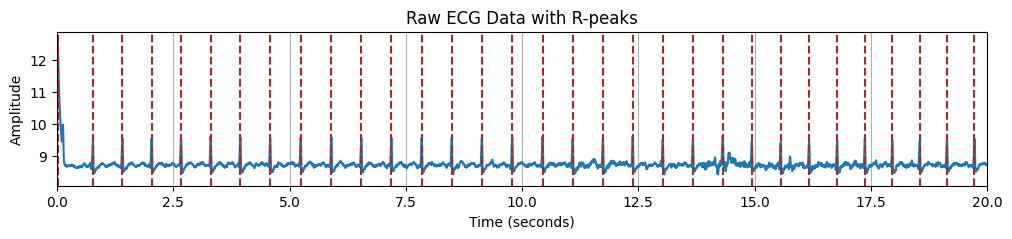

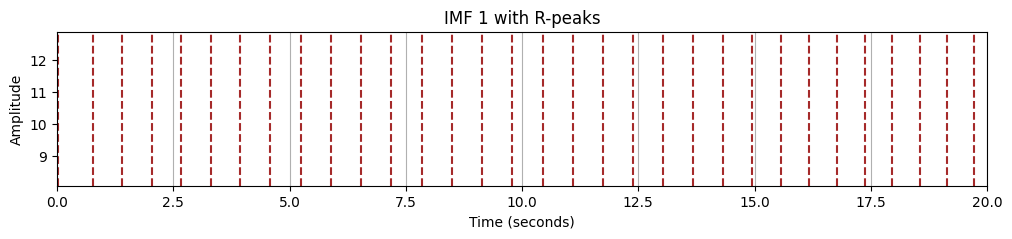

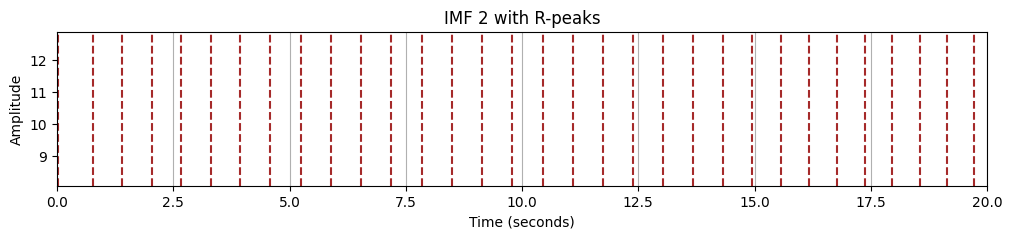

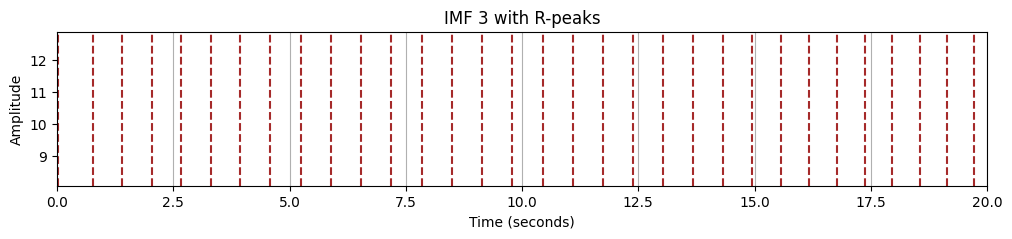

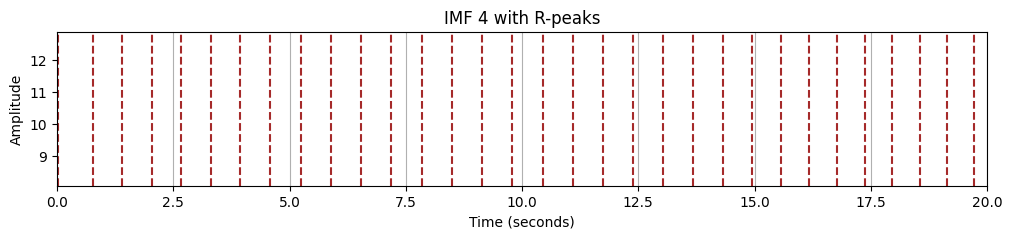

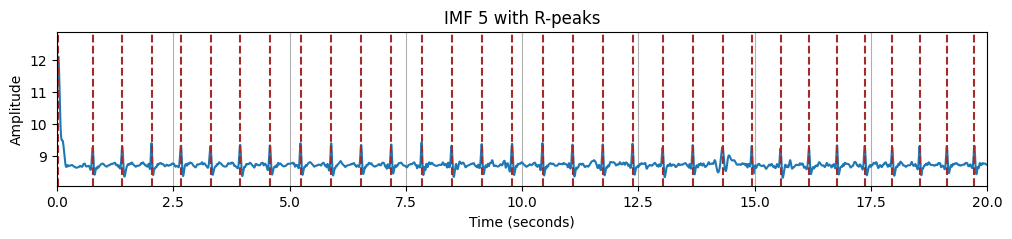

In [ ]:
# Choose subsection limits
x1 = 0
x2 = 20

# Plot raw ECG signal with R-peaks
plt.figure(figsize=(12, 2))
plt.plot(time_ecg, ecg_data)
plt.title('Raw ECG Data with R-peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
for r_peak in r_peaks_time:
    plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
ylim = plt.ylim()  # Save the y-axis limits
plt.xlim(x1, x2)
plt.show()


# Plot IMFs with R-peaks
for i in range(n_imfs_ecg):
    plt.figure(figsize=(12, 2))
    plt.plot(time_ecg, imfs_ecg[i])
    plt.title('IMF ' + str(i+1) + ' with R-peaks')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    for r_peak in r_peaks_time:
        if x1 <= r_peak <= x2:  # Only plot R-peaks in the range 0 to 20 seconds
          plt.axvline(x=r_peak, color='brown', linestyle='--')
    plt.ylim(ylim)  # Apply the y-axis limits from the raw signal plot
    plt.xlim(x1, x2)
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, link

# Subsection
step_size = 8000

# Assuming ecg_data, time_ecg, and imfs_ecg already exist
def plot_func(start):
    end = start + step_size  # plot 1000 data points at a time
    indices = range(start, end)

    plt.figure(figsize=(12, 2))
    plt.plot(time_ecg[indices], ecg_data[indices])
    plt.title('Raw ECG data')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    # for r_peak in r_peaks_time:
    #   if start/1000 <= r_peak <= (start+1.5*step_size)/1000:
    #     plt.axvline(x=r_peak, color='brown', linestyle='--')
    ylim = plt.ylim()
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()

    # Plot IMFs
    for i in range(imfs_ecg.shape[0]):
        plt.figure(figsize=(12, 2))
        plt.plot(time_ecg[indices], imfs_ecg[i][indices])
        plt.title('IMF ' + str(i+1))
        plt.xlabel('Time (seconds)')
        plt.ylabel('Amplitude')
        # for r_peak in r_peaks_time:
        #   if start/1000 <= r_peak <= (start+1.5*step_size)/1000:
        #     plt.axvline(x=r_peak, color='brown', linestyle='--')
        plt.ylim(ylim)  # Apply the y-axis limits from the raw signal plot
        plt.grid(axis='x')  # Show x-axis gridlines
        plt.show()

# Create a slider and a text box and link them
start_slider = widgets.IntSlider(min=0, max=len(ecg_data)-step_size, step=step_size, value=0)
start_text = widgets.IntText(min=0, max=len(ecg_data)-step_size, step=step_size, value=0)
link((start_slider, 'value'), (start_text, 'value'))

# Create the interactive plot with the slider and text box
display(start_text);
interact(plot_func, start=start_slider);
# start=widgets.IntText(min=0, max=len(ecg_data)-1000, step=1000, value=0)


IntText(value=0, step=8000)

interactive(children=(IntSlider(value=0, description='start', max=340673, step=8000), Output()), _dom_classes=…

In [ ]:
import scipy.stats

# Compute the energy content for each IMF
ecg_imf_energy = [np.sum(np.abs(imf)**2) for imf in imfs_ecg]

# Compute statistical properties for each IMF
ecg_imf_mean = [np.mean(imf) for imf in imfs_ecg]
ecg_imf_std = [np.std(imf) for imf in imfs_ecg]
ecg_imf_kurtosis = [scipy.stats.kurtosis(imf) for imf in imfs_ecg]
ecg_imf_skewness = [scipy.stats.skew(imf) for imf in imfs_ecg]

# Print the results
for i in range(imfs_ecg.shape[0]):
    print(f'IMF {i+1}:')
    print(f'  Energy content: {ecg_imf_energy[i]}')
    print(f'  Mean: {ecg_imf_mean[i]}')
    print(f'  Standard deviation: {ecg_imf_std[i]}')
    print(f'  Kurtosis: {ecg_imf_kurtosis[i]}')
    print(f'  Skewness: {ecg_imf_skewness[i]}\n')



IMF 1:
  Energy content: 37.94463712300037
  Mean: -6.25271973324548e-05
  Standard deviation: 0.010431775722572114
  Kurtosis: 817.9452687835759
  Skewness: -3.329020784282806

IMF 2:
  Energy content: 259.62739092143926
  Mean: 0.000294428535187467
  Standard deviation: 0.027286058978489295
  Kurtosis: 7.382472900421666
  Skewness: 0.12976345281607995

IMF 3:
  Energy content: 316.43435796718785
  Mean: 0.001003456797977382
  Standard deviation: 0.030108671666187744
  Kurtosis: 5.751542647530703
  Skewness: 0.03189244655626454

IMF 4:
  Energy content: 359.8367910501827
  Mean: 0.0011799527761787935
  Standard deviation: 0.0321033588746506
  Kurtosis: 3.0485646975668947
  Skewness: 0.015251161633710906

IMF 5:
  Energy content: 26633626.254717585
  Mean: 8.738639226720672
  Standard deviation: 0.14788627594076148
  Kurtosis: 14.793653639709586
  Skewness: 2.2846145180412587



In [ ]:
import itertools

In [ ]:
# Number of IMFs
n_imfs = len(imfs_ecg)

# Create a list to hold the mean squared errors for each partition
mse_list = []

# Iterate over all possible ways to split the IMFs into two groups
for i in range(1, n_imfs):  # Start from 1 to prevent empty 'core' or 'noisy' signals
    # Get all combinations of IMFs of length i
    combinations = list(itertools.combinations(range(n_imfs), i))

    for combo in combinations:
        # Create a mask of the IMFs included in this combination
        mask = np.zeros(n_imfs, dtype=bool)
        mask[np.array(combo)] = True

        # Ensure neither the 'core' nor 'noisy' signals are composed of 0 IMFs
        if np.sum(mask) == 0 or np.sum(~mask) == 0:
            continue

        # Calculate the 'core' and 'noisy' signals
        core_signal = np.sum(imfs_ecg[mask], axis=0)
        noisy_signal = np.sum(imfs_ecg[~mask], axis=0)

        # Compute the mean squared error between the original signal and the sum of the 'core' IMFs
        mse = np.mean((ecg_data - core_signal)**2)

        # Store the MSE and the combination of IMFs that resulted in it
        mse_list.append((mse, combo))

        # Print each MSE and corresponding combination
        print(f'Combination: {combo}, MSE: {mse}')

# Find the combination of IMFs that resulted in the smallest MSE
min_mse, best_combo = min(mse_list)

# Create a mask for the best combination
best_mask = np.zeros(n_imfs, dtype=bool)
best_mask[np.array(best_combo)] = True

# Compute the 'core' and 'noisy' signals for the best combination
core_signal = np.sum(imfs_ecg[best_mask], axis=0)
noisy_signal = np.sum(imfs_ecg[~best_mask], axis=0)

# Print the best combination of IMFs and the corresponding MSE
print('\nBest combination of IMFs:', best_combo)
print('MSE:', min_mse)

# Print the 'core' and 'noisy' IMFs
print('Core IMFs:', np.where(best_mask)[0])
print('Noisy IMFs:', np.where(~best_mask)[0])


Combination: (0,), MSE: 76.4310886875685
Combination: (1,), MSE: 76.42456671466967
Combination: (2,), MSE: 76.41126900529983
Combination: (3,), MSE: 76.40734153192325
Combination: (4,), MSE: 0.0038891421156165896
Combination: (0, 1), MSE: 76.42577577710662
Combination: (0, 2), MSE: 76.41244845355669
Combination: (0, 3), MSE: 76.40850574168671
Combination: (0, 4), MSE: 0.0038174608572400363
Combination: (1, 2), MSE: 76.40627101144203
Combination: (1, 3), MSE: 76.40221531613331
Combination: (1, 4), MSE: 0.0026055928792231365
Combination: (2, 3), MSE: 76.38932526673777
Combination: (2, 4), MSE: 0.002064623752729639
Combination: (3, 4), MSE: 0.0020836052737930686
Combination: (0, 1, 2), MSE: 76.40746290045148
Combination: (0, 1, 3), MSE: 76.4033919666493
Combination: (0, 1, 4), MSE: 0.002546352373403529
Combination: (0, 2, 3), MSE: 76.39047230307364
Combination: (0, 2, 4), MSE: 0.0019757690667962036
Combination: (0, 3, 4), MSE: 0.0019795120944165532
Combination: (1, 2, 3), MSE: 76.38452640

In [ ]:
# Sort the list of MSEs and combinations from smallest to largest by MSE
sorted_mse_list = sorted(mse_list, key=lambda x: x[0])

# Print the top 10 combinations
print("Top 10 combinations and their MSEs:")
for i in range(10):
    mse, combo = sorted_mse_list[i]
    print(f'Rank {i+1} combination: {combo}, MSE: {mse}')

# Create a mask for the best combination
best_mask = np.zeros(n_imfs, dtype=bool)
best_mask[np.array(sorted_mse_list[0][1])] = True  # Use the combination from the best (first) tuple

# Compute the 'core' and 'noisy' signals for the best combination
core_signal = np.sum(imfs_ecg[best_mask], axis=0)
noisy_signal = np.sum(imfs_ecg[~best_mask], axis=0)

# Print the best combination of IMFs and the corresponding MSE
print('\nBest combination of IMFs:', sorted_mse_list[0][1])
print('MSE:', sorted_mse_list[0][0])

# Print the 'core' and 'noisy' IMFs
print('Core IMFs:', np.where(best_mask)[0])
print('Noisy IMFs:', np.where(~best_mask)[0])


Top 10 combinations and their MSEs:
Rank 1 combination: (1, 2, 3, 4), MSE: 0.00010882585437645122
Rank 2 combination: (0, 2, 3, 4), MSE: 0.000744615702739929
Rank 3 combination: (2, 3, 4), MSE: 0.0008658823096733256
Rank 4 combination: (0, 1, 3, 4), MSE: 0.0009075390350477034
Rank 5 combination: (1, 3, 4), MSE: 0.0009991914618672733
Rank 6 combination: (0, 1, 2, 4), MSE: 0.001032017939588619
Rank 7 combination: (1, 2, 4), MSE: 0.0011084318729651078
Rank 8 combination: (0, 2, 4), MSE: 0.0019757690667962036
Rank 9 combination: (0, 3, 4), MSE: 0.0019795120944165532
Rank 10 combination: (2, 4), MSE: 0.002064623752729639

Best combination of IMFs: (1, 2, 3, 4)
MSE: 0.00010882585437645122
Core IMFs: [1 2 3 4]
Noisy IMFs: [0]


# BR Data

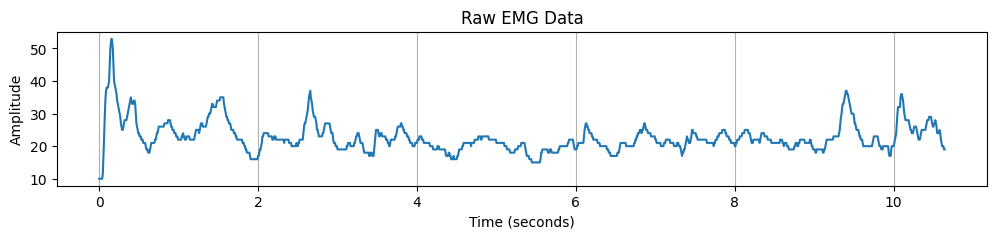

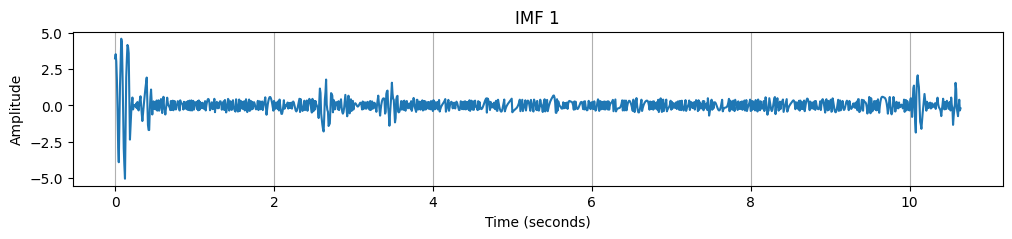

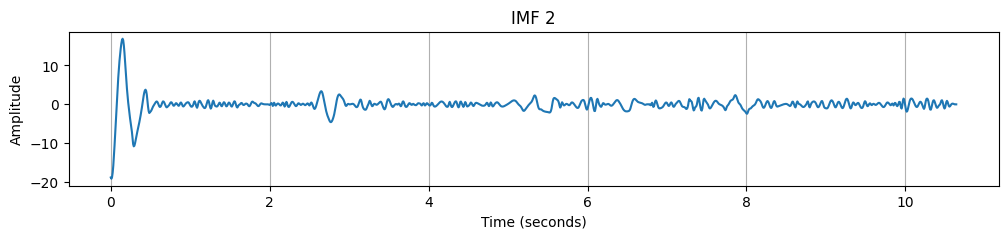

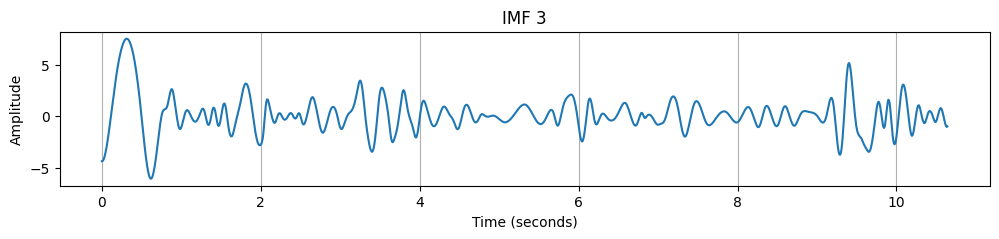

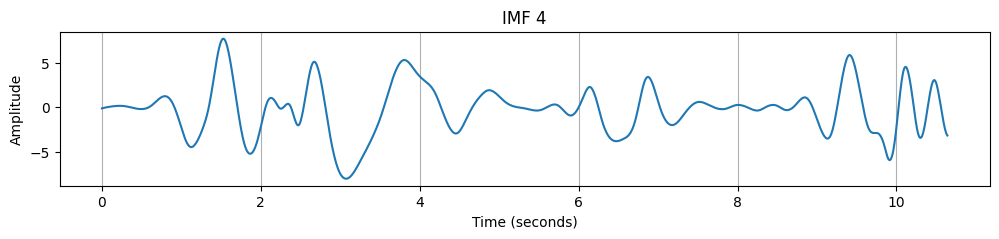

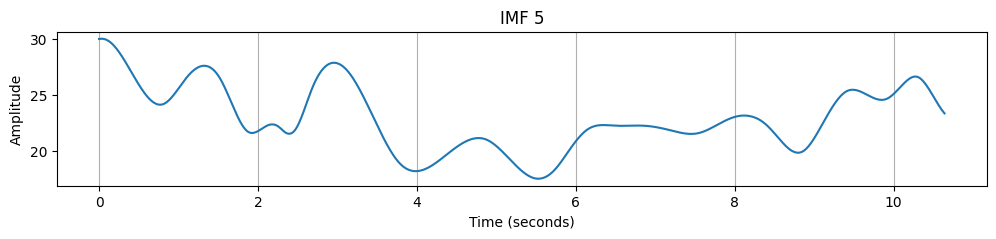

In [ ]:
# Plot raw EMG signal
plt.figure(figsize=(12, 2))
plt.plot(time_br, br_data)
plt.title('Raw EMG Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
# for r_peak in r_peaks_time:
#     plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()

# Plot IMFs
for i in range(n_imfs_br):
    plt.figure(figsize=(12, 2))
    plt.plot(time_br, imfs_br[i])
    plt.title('IMF ' + str(i+1))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    # for r_peak in r_peaks_time:
    #     plt.axvline(x=r_peak, color='brown', linestyle='--')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()

# EDA Data

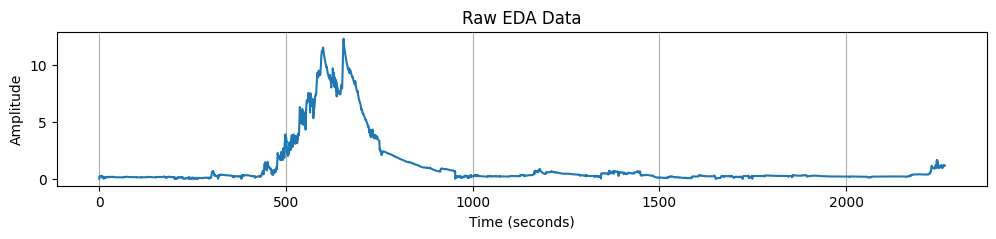

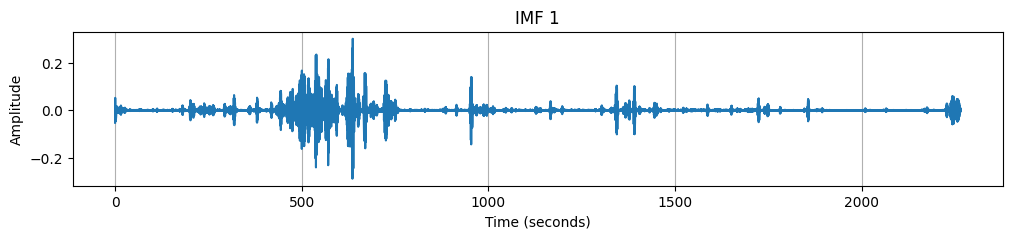

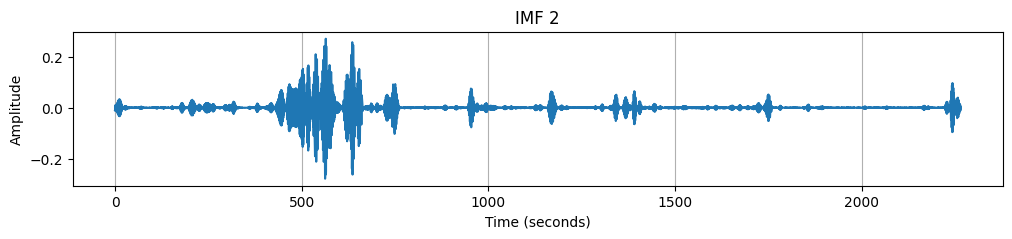

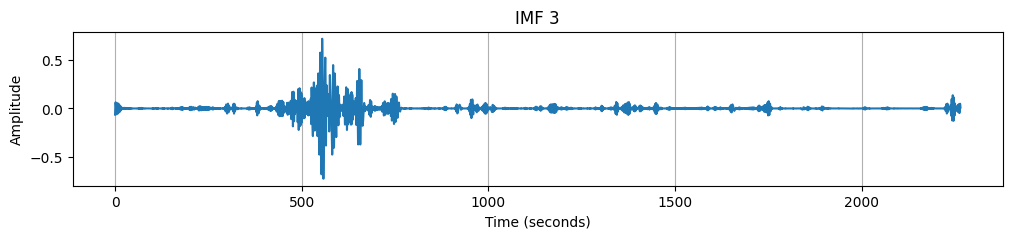

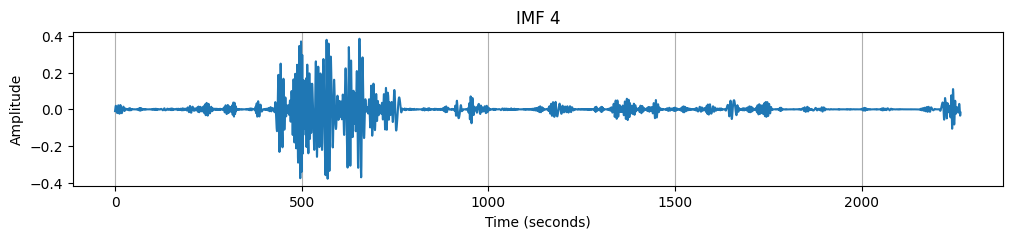

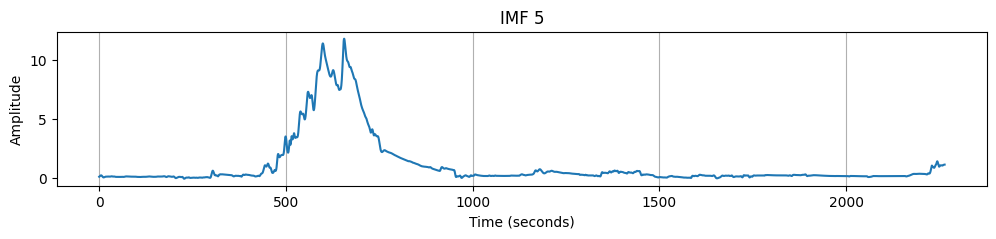

In [ ]:
# Plot raw EMG signal
plt.figure(figsize=(12, 2))
plt.plot(time_eda, eda_data)
plt.title('Raw EDA Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
# for r_peak in r_peaks_time:
#     plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()

# Plot IMFs
for i in range(n_imfs_eda):
    plt.figure(figsize=(12, 2))
    plt.plot(time_eda, imfs_eda[i])
    plt.title('IMF ' + str(i+1))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    # for r_peak in r_peaks_time:
    #     plt.axvline(x=r_peak, color='brown', linestyle='--')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()

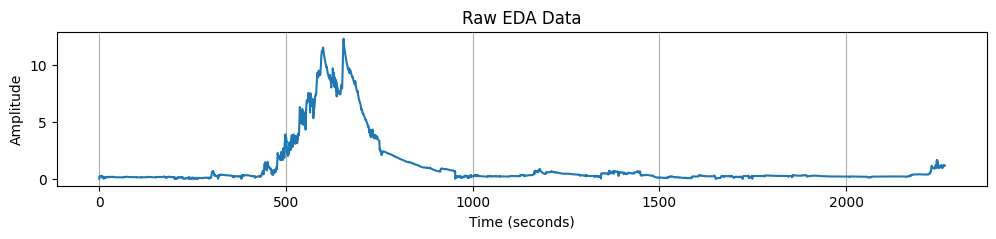

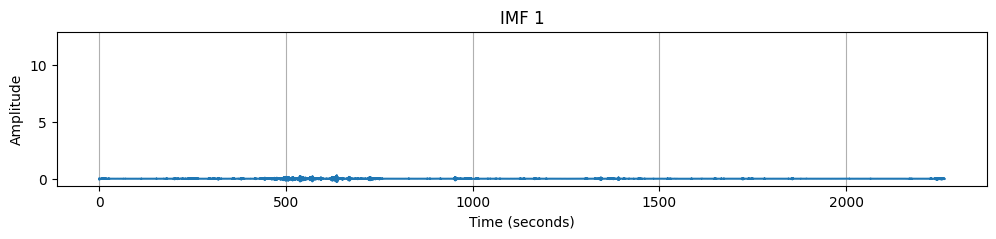

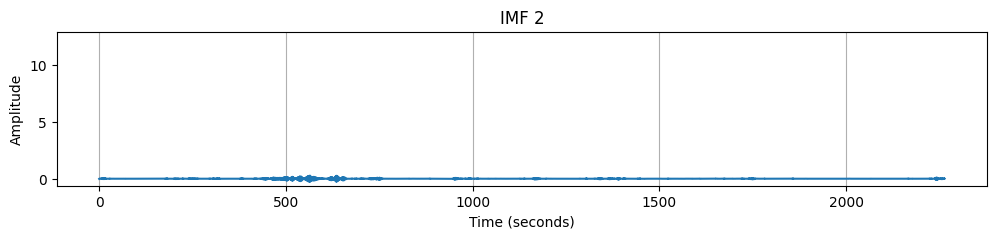

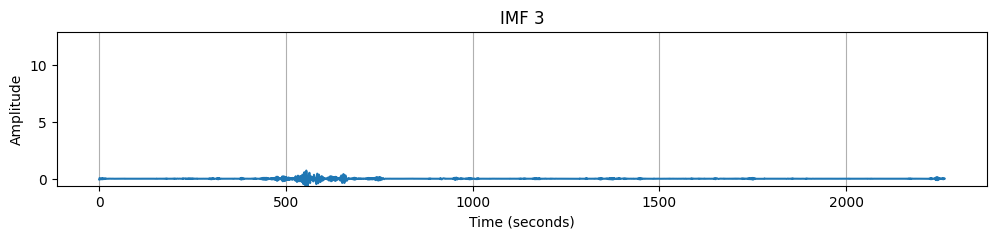

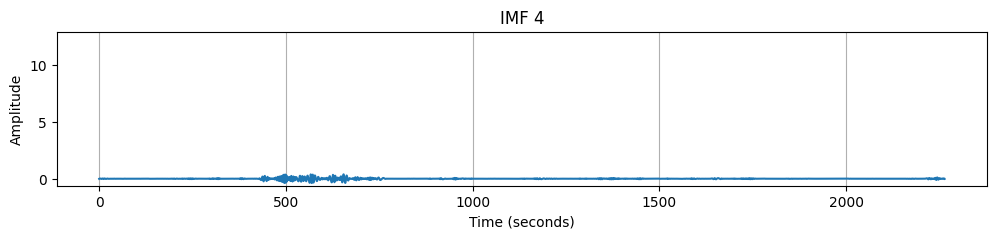

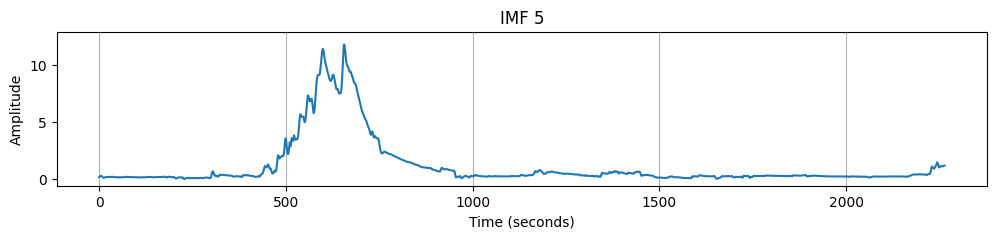

In [ ]:

# Plot raw EMG signal
plt.figure(figsize=(12, 2))
plt.plot(time_eda, eda_data)
plt.title('Raw EDA Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
# for r_peak in r_peaks_time:
#     plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
ylim = plt.ylim()
plt.show()

# Plot IMFs
for i in range(n_imfs_eda):
    plt.figure(figsize=(12, 2))
    plt.plot(time_eda, imfs_eda[i])
    plt.title('IMF ' + str(i+1))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    # for r_peak in r_peaks_time:
    #     plt.axvline(x=r_peak, color='brown', linestyle='--')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.ylim(ylim)
    plt.show()

# BVP Data

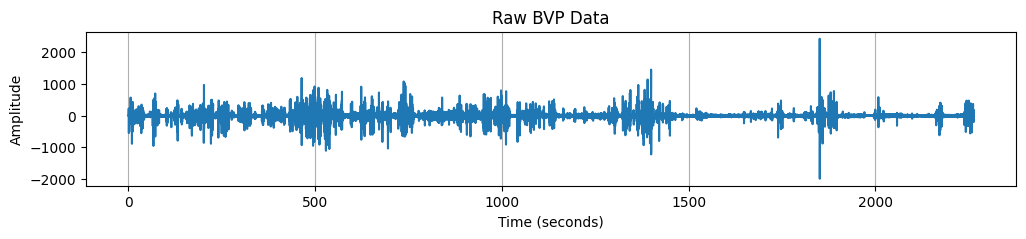

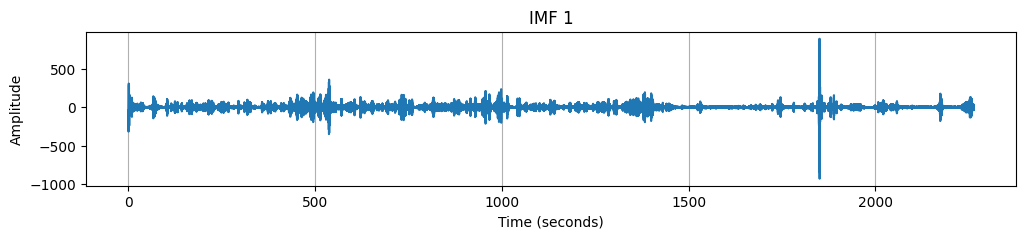

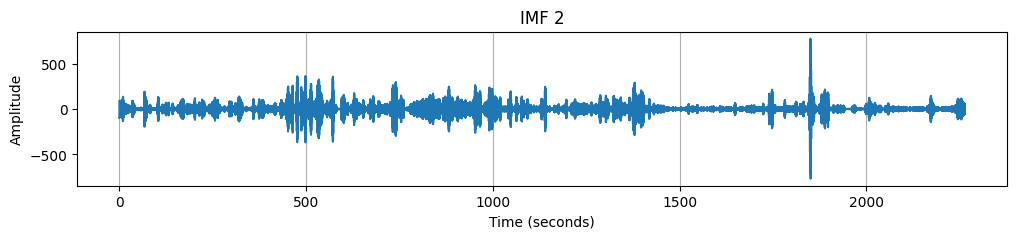

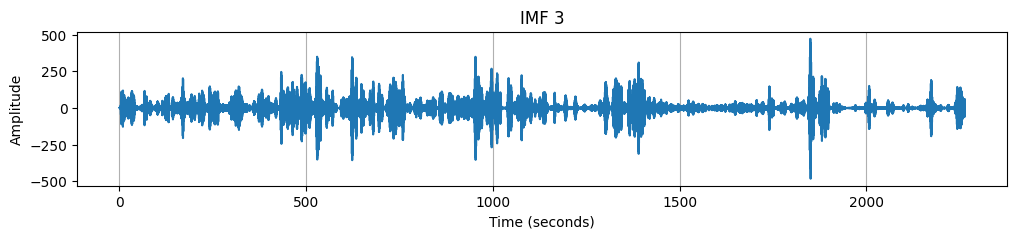

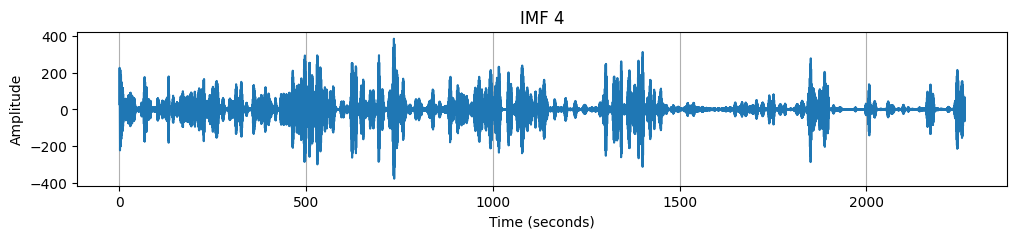

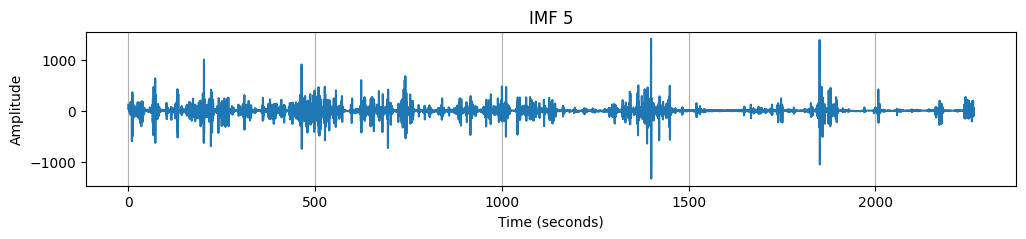

In [ ]:
# Plot raw EMG signal
plt.figure(figsize=(12, 2))
plt.plot(time_bvp, bvp_data)
plt.title('Raw BVP Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
# for r_peak in r_peaks_time:
#     plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
plt.show()

# Plot IMFs
for i in range(n_imfs_bvp):
    plt.figure(figsize=(12, 2))
    plt.plot(time_bvp, imfs_bvp[i])
    plt.title('IMF ' + str(i+1))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    # for r_peak in r_peaks_time:
    #     plt.axvline(x=r_peak, color='brown', linestyle='--')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.show()

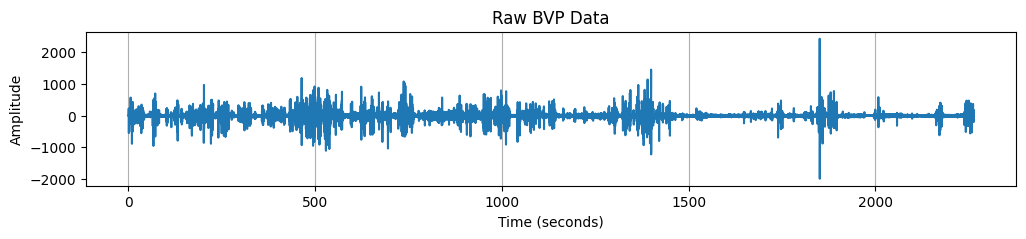

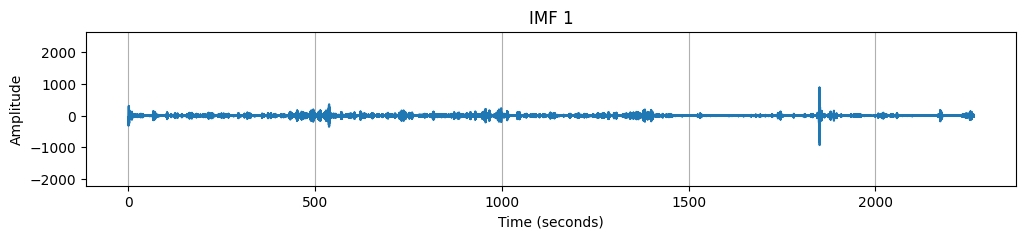

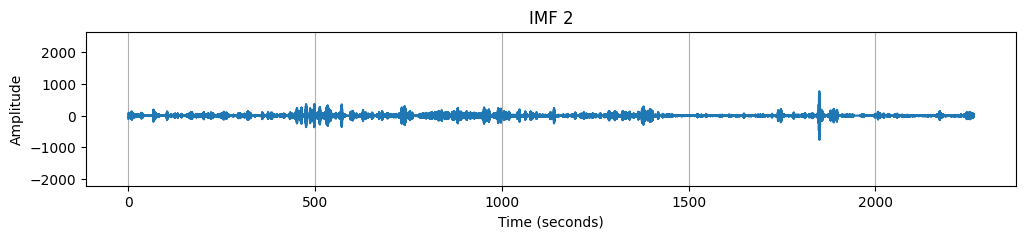

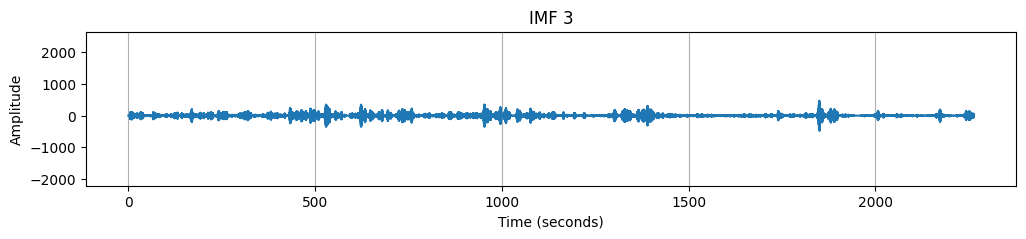

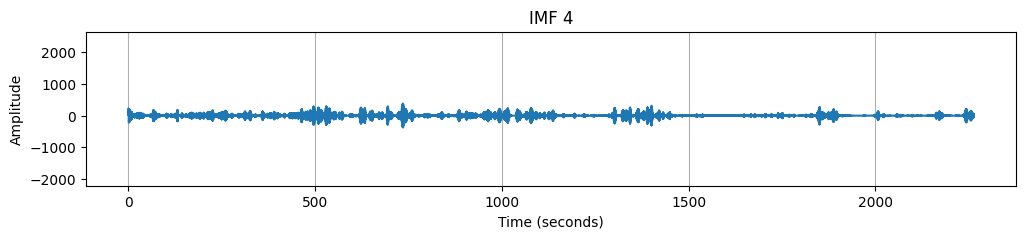

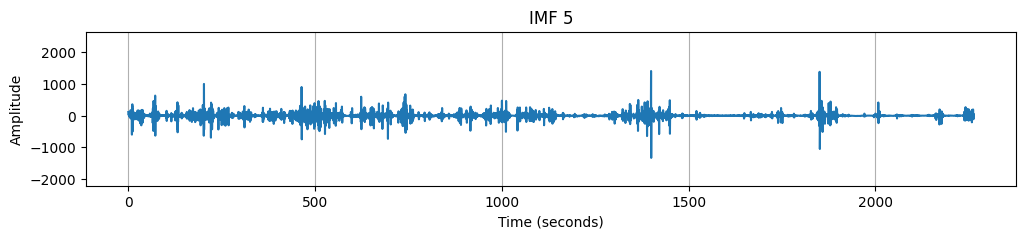

In [ ]:
# Plot raw EMG signal
plt.figure(figsize=(12, 2))
plt.plot(time_bvp, bvp_data)
plt.title('Raw BVP Data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
# for r_peak in r_peaks_time:
#     plt.axvline(x=r_peak, color='brown', linestyle='--')
plt.grid(axis='x')  # Show x-axis gridlines
ylim = plt.ylim()
plt.show()

# Plot IMFs
for i in range(n_imfs_bvp):
    plt.figure(figsize=(12, 2))
    plt.plot(time_bvp, imfs_bvp[i])
    plt.title('IMF ' + str(i+1))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    # for r_peak in r_peaks_time:
    #     plt.axvline(x=r_peak, color='brown', linestyle='--')
    plt.grid(axis='x')  # Show x-axis gridlines
    plt.ylim(ylim)
    plt.show()